# Assignment 5
## Business understanding
In this report we're searching for optimal drone hub locations for a drone delivery service.

## Data understanding
The 2 datasets used provide customer locations and sales data for products.
Clustering methods are used for analyzing customer locations and association rule mining is used for sales data.

## Data preparation
The customer locations dataset was already in good shape, but for the sales dataset the id column was dropped and 1/0 integers were changed in to True/False booleans.

## Clustering
### Modeling

In [ ]:
from IPython.display import display, Markdown
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

customer_locations = pd.read_csv("./assets/drone_cust_locations.csv", sep=";")

sns.scatterplot(data=customer_locations, x="x", y="y")

model = KMeans(init='random', n_clusters=3)
model.fit(customer_locations[["x", "y"]])

In [2]:
customer_locations["closest_depot"] = model.labels_
customer_locations.head(10)

,clientid,x,y,closest_depot
0,1,622.771572,164.857623,0
1,2,416.357298,630.193634,2
2,3,292.735020,567.333231,1
3,4,737.211288,166.225676,0
4,5,540.475375,682.912298,2
5,6,535.469492,318.439661,0
6,7,640.380050,870.833221,2
7,8,235.772075,359.048203,1
8,9,481.896884,661.491838,2
9,10,730.032789,312.177817,0


<Axes: xlabel='x', ylabel='y'>

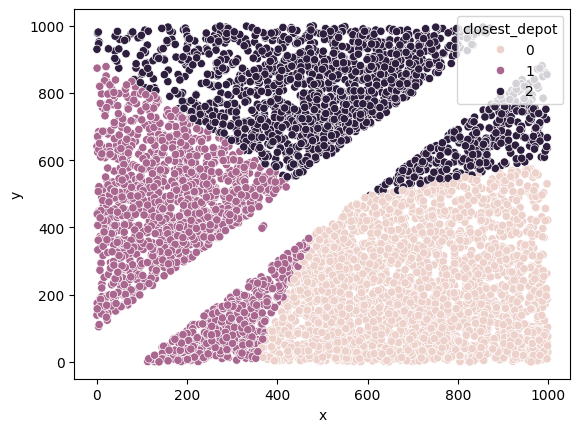

In [3]:
sns.scatterplot(data=customer_locations, x="x", y="y", hue="closest_depot")

In [39]:
def timetocreate_kmeans_model(clusters):
    model = KMeans(init='random', n_clusters=clusters)
    start_time = time.time()
    model.fit(customer_locations[["x", "y"]])
    return time.time() - start_time

cluster_amounts = [2, 10] # Modify this list to test other cluster amounts

prev_execution_time = None
for clusters in cluster_amounts:
    execution_time = timetocreate_kmeans_model(clusters)
    if prev_execution_time:
        exec_time_diff = execution_time - prev_execution_time
        exec_time_diff_percent = (execution_time - prev_execution_time) / abs(prev_execution_time) * 100
        display(Markdown(f"{clusters} clusters: {execution_time}s (Diff {exec_time_diff}s or {exec_time_diff_percent}%)"))
    else:
        display(Markdown(f"{clusters} clusters: {execution_time}s"))
    prev_execution_time = execution_time

2 clusters: 0.02757716178894043s

10 clusters: 0.05413937568664551s (Diff 0.026562213897705078s or 96.3196071481062%)

When creating a 10 cluster kmeans model, it usually takes about twice as long as creating a 2 cluster kmeans model.

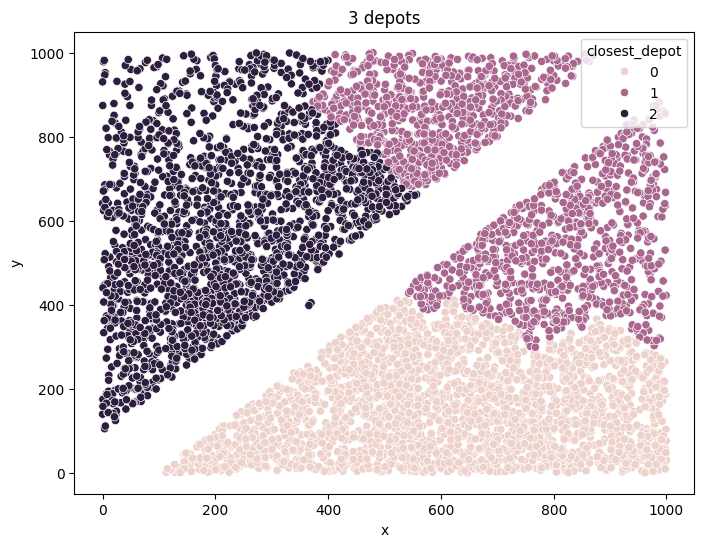

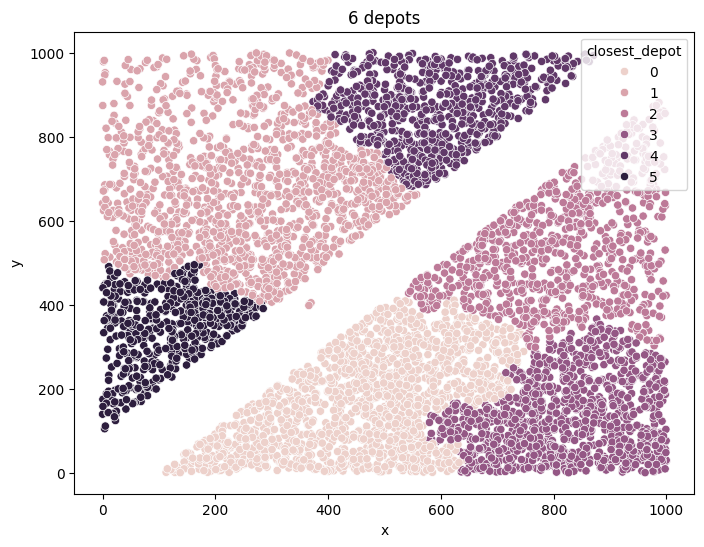

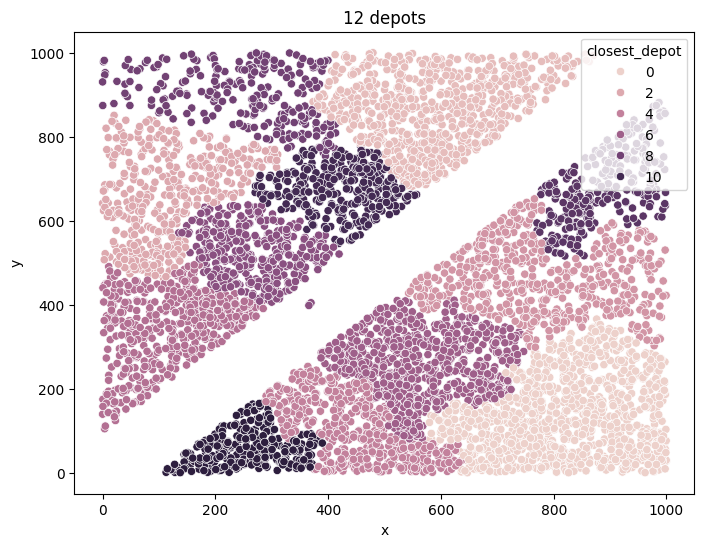

In [17]:
customer_locations = pd.read_csv("./assets/drone_cust_locations.csv", sep=";")

cluster_amounts = [3, 6, 12] # Modify this list to test other cluster amounts

for clusters in cluster_amounts:
    plt.figure(figsize=(8, 6))
    
    ac_model = AgglomerativeClustering(n_clusters=clusters)
    ac_model.fit(customer_locations[["x", "y"]])
    
    customer_locations["closest_depot"] = ac_model.labels_
    sns.scatterplot(data=customer_locations, x="x", y="y", hue="closest_depot")

    plt.title(f"{clusters} depots")
    plt.show()

### Evaluation
Multiple depots allow more support for dense areas, while less depots will force you to prioritize coverage.

## Association rule mining
### Modeling

In [61]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

sales_data = pd.read_csv("./assets/drone_prod_groups.csv").drop(columns="ID")
sales_data = sales_data.astype(bool)
frequent_itemsets = apriori(sales_data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules = rules.sort_values(by='confidence', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,frozenset({ Prod15}),frozenset({ Prod9}),0.11880,0.19853,0.11145,0.938131,4.725388,1.0,0.087865,12.954372,0.894663,0.541335,0.922806,0.749754
3,frozenset({ Prod20}),frozenset({ Prod19}),0.14798,0.20626,0.13476,0.910664,4.415125,1.0,0.104238,8.884845,0.907849,0.613997,0.887449,0.782007
2,frozenset({ Prod19}),frozenset({ Prod20}),0.20626,0.14798,0.13476,0.653350,4.415125,1.0,0.104238,2.457869,0.974508,0.613997,0.593144,0.782007
0,frozenset({ Prod9}),frozenset({ Prod15}),0.19853,0.11880,0.11145,0.561376,4.725388,1.0,0.087865,2.009011,0.983664,0.541335,0.502243,0.749754


### Evaluation
With these associations a business could create bundle discounts for some products together or advertise for example Prod9 to Prod15 purchasers. 